## Project Title: House Price Prediction 

## Description:
In this project, we aim to develop a machine learning model that predicts the prices of houses based on various features such as location, size, number of bedrooms, number of bathrooms, amenities, and other relevant factors. We will use a dataset containing historical housing data, including features and corresponding sale prices, to train and evaluate the model.

## Dataset Description
This dataset provides comprehensive information for house price prediction, with 13 column names:

- Price: The price of the house.
- Area: The total area of the house in square feet.
- Bedrooms: The number of bedrooms in the house.
- Bathrooms: The number of bathrooms in the house.
- Stories: The number of stories in the house.
- Mainroad: Whether the house is connected to the main road (Yes/No).
- Guestroom: Whether the house has a guest room (Yes/No).
- Basement: Whether the house has a basement (Yes/No).
- Hot water heating: Whether the house has a hot water heating system (Yes/No).
- Airconditioning: Whether the house has an air conditioning system (Yes/No).
- Parking: The number of parking spaces available within the house.
- Prefarea: Whether the house is located in a preferred area (Yes/No).
- Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

## Goal 
Analyze the data provided and build a linear regression model to predict the price of a house and identify factors that significantly influence it.

## Importing Libraries

In [1]:
## Libraries for loading and overview
import pandas as pd
import numpy as np

## Libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## Libraries for ml algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


# categorical encoding 
from sklearn.feature_extraction import DictVectorizer

## Libraries for prediction accuracy
from sklearn.metrics import root_mean_squared_error


In [2]:
## Loading and Overview of Dataset
data = pd.read_csv('Dataset/Housing.csv')

## Creating a copy
df = data.copy()
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
## preview the first five rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
## preview the last five rows
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
## Transpose the dataset
df.T

,0,1,2,3,4,5,6,7,8,9,...,535,536,537,538,539,540,541,542,543,544
price,13300000,12250000,12250000,12215000,11410000,10850000,10150000,10150000,9870000,9800000,...,2100000,1960000,1890000,1890000,1855000,1820000,1767150,1750000,1750000,1750000
area,7420,8960,9960,7500,7420,7500,8580,16200,8100,5750,...,3360,3420,1700,3649,2990,3000,2400,3620,2910,3850
bedrooms,4,4,3,4,4,3,4,5,4,3,...,2,5,3,2,2,2,3,2,3,3
bathrooms,2,4,2,2,1,3,3,3,1,2,...,1,1,1,1,1,1,1,1,1,1
stories,3,4,2,2,2,1,4,2,2,4,...,1,2,2,1,1,1,1,1,1,2
mainroad,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,no,yes,yes,no,yes,no,yes,no,yes
guestroom,no,no,no,no,yes,no,no,no,yes,yes,...,no,no,no,no,no,no,no,no,no,no
basement,no,no,yes,yes,yes,yes,no,no,yes,no,...,no,no,no,no,no,yes,no,no,no,no
hotwaterheating,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
airconditioning,yes,yes,no,yes,yes,yes,yes,no,yes,yes,...,no,no,no,no,no,no,no,no,no,no


## Understanding the Dataset

In [6]:
## check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
## check for unique columns
for each_name in df.columns:
    print(each_name)
    print(df[each_name])

price
0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64
area
0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64
bedrooms
0      4
1      4
2      3
3      4
4      4
      ..
540    2
541    3
542    2
543    3
544    3
Name: bedrooms, Length: 545, dtype: int64
bathrooms
0      2
1      4
2      2
3      2
4      1
      ..
540    1
541    1
542    1
543    1
544    1
Name: bathrooms, Length: 545, dtype: int64
stories
0      3
1      4
2      2
3      2
4      2
      ..
540    1
541    1
542    1
543    1
544    2
Name: stories, Length: 545, dtype: int64
mainroad
0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
540    yes
541     no
542    yes
543     no
544    yes
Name: mainroad, Length: 

In [8]:
## check for total in rows and columns in the dataset
r = df.shape[0]
c = df.shape[1]
print(f'Total Number of Rows:{r}\nTotal Number of Columns:{c}')

Total Number of Rows:545
Total Number of Columns:13


In [9]:
## check the column types of the dataset
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

## Data Preprocessing

In [12]:
## converting data types from object to categorical
df['mainroad'] = df['mainroad'].astype('category')
df['guestroom'] = df['guestroom'].astype('category')
df['basement'] = df['basement'].astype('category')
df['hotwaterheating'] = df['hotwaterheating'].astype('category')
df['airconditioning'] = df['airconditioning'].astype('category')
df['prefarea'] = df['prefarea'].astype('category')
df['furnishingstatus'] = df['furnishingstatus'].astype('category')

In [13]:
df.dtypes

price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object

## Exploratory Data Analysis (EDA)

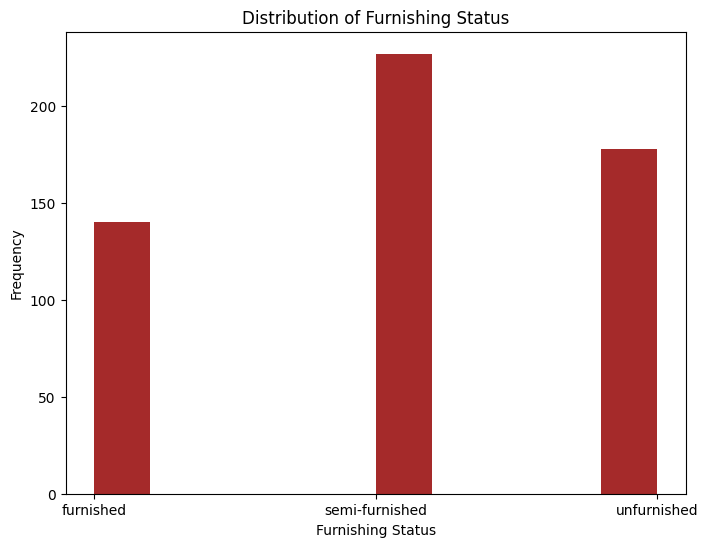

In [14]:
## Explore the  data columns 

plt.figure(figsize = (8,6))
plt.hist(df['furnishingstatus'],color = 'brown', bins = 10)
plt.title('Distribution of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Frequency')
plt.show()

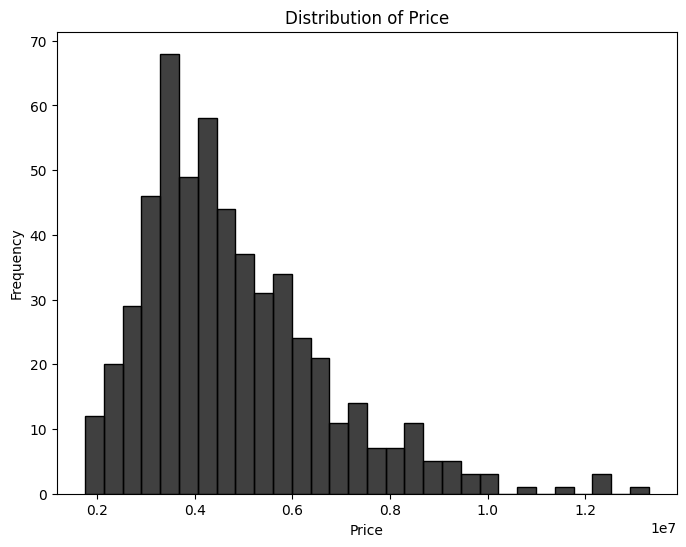

In [15]:
plt.figure(figsize = (8,6))
sns.histplot(df['price'],color = 'black', bins = 30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [16]:
## log transformation
## Normalizing the skewed data
log_price = np.log1p(df['price'])

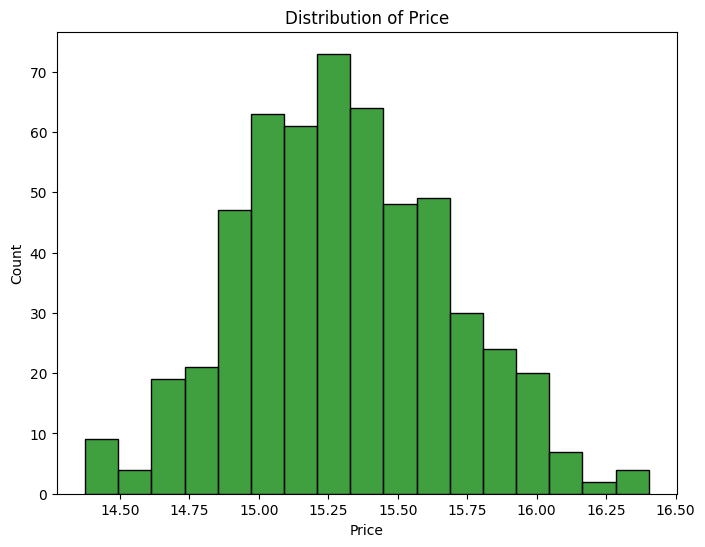

In [17]:
plt.figure(figsize = (8,6))
sns.histplot(log_price, color='green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show() 

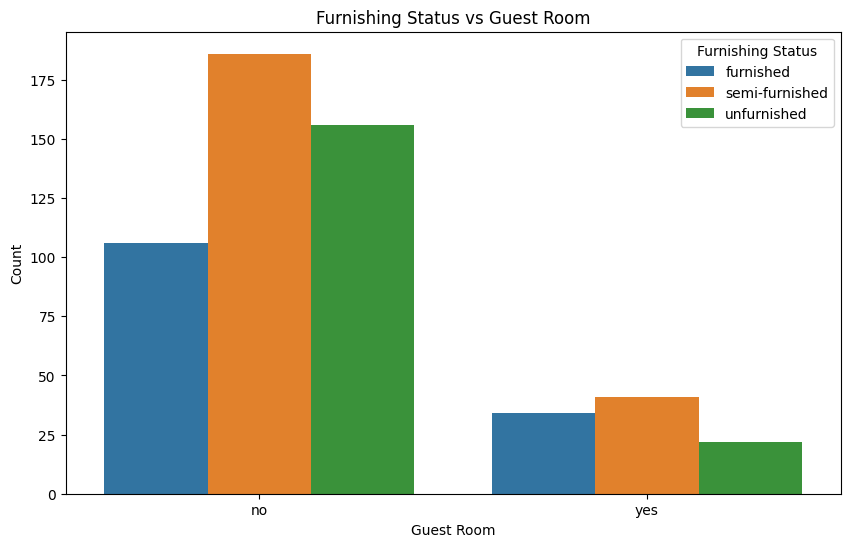

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='guestroom', hue='furnishingstatus', data=df)
plt.title('Furnishing Status vs Guest Room')
plt.xlabel('Guest Room')
plt.ylabel('Count')
plt.legend(title='Furnishing Status')
plt.show()

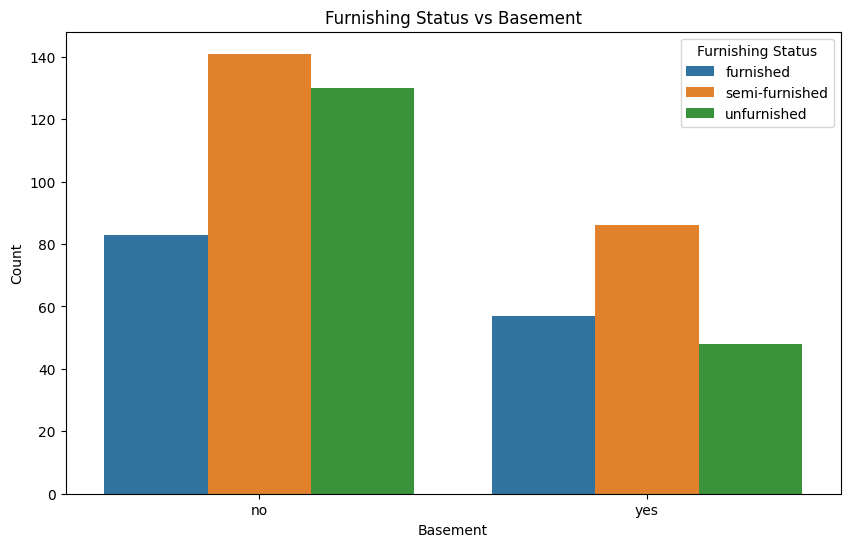

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='basement', hue='furnishingstatus', data=df)
plt.title('Furnishing Status vs Basement')
plt.xlabel('Basement')
plt.ylabel('Count')
plt.legend(title='Furnishing Status')
plt.show()

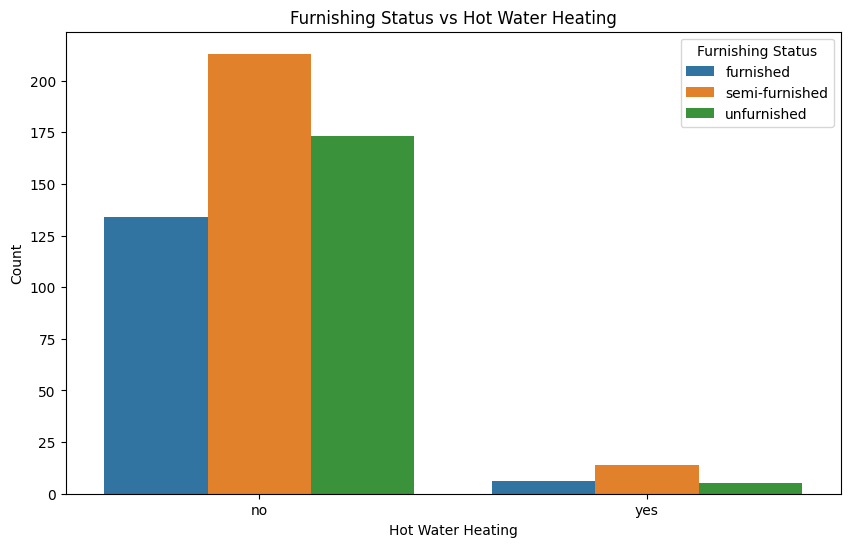

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hotwaterheating', hue='furnishingstatus', data=df)
plt.title('Furnishing Status vs Hot Water Heating')
plt.xlabel('Hot Water Heating')
plt.ylabel('Count')
plt.legend(title='Furnishing Status')
plt.show()

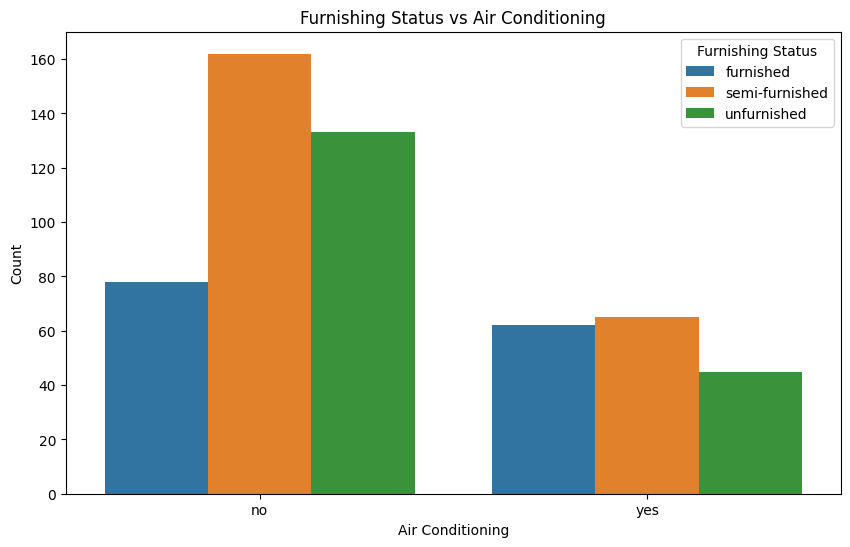

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airconditioning', hue='furnishingstatus', data=df)
plt.title('Furnishing Status vs Air Conditioning')
plt.xlabel('Air Conditioning')
plt.ylabel('Count')
plt.legend(title='Furnishing Status')
plt.show()

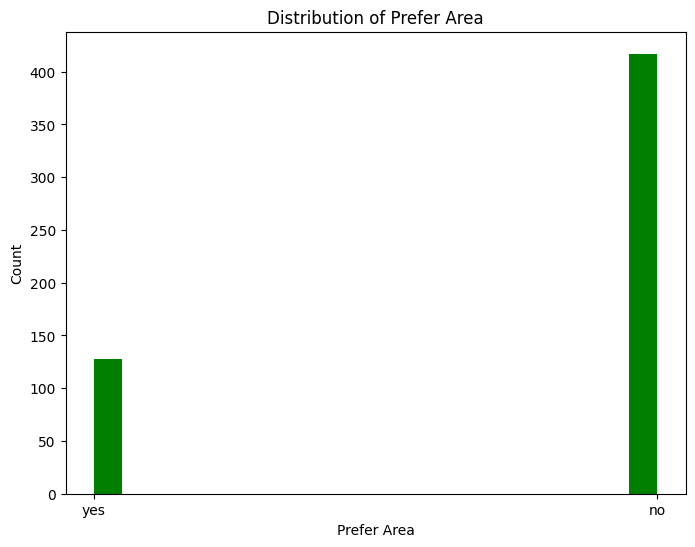

In [23]:
plt.figure(figsize = (8,6))
plt.hist(df['prefarea'], color='green', bins = 20)
plt.title('Distribution of Prefer Area')
plt.xlabel('Prefer Area')
plt.ylabel('Count')
plt.show() 

## Scatter Plot

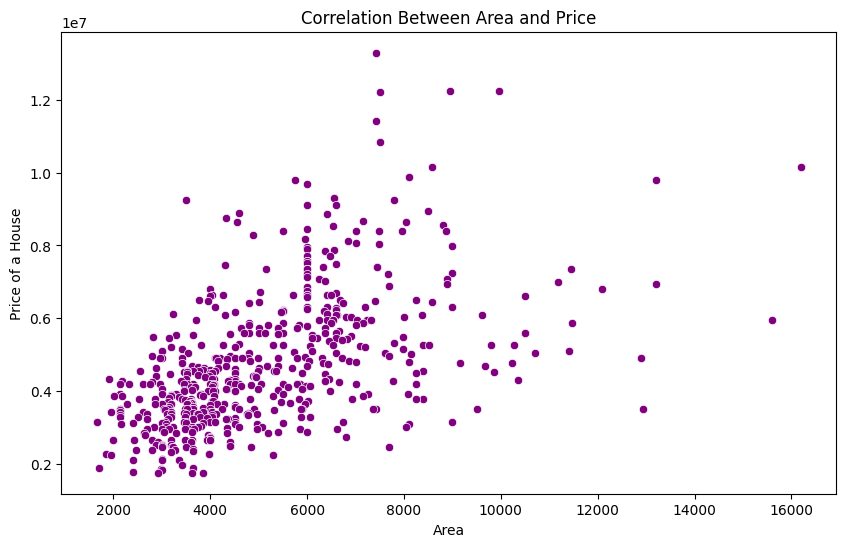

In [24]:
## The correlation between price and area
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df, x='area', y='price', color = 'purple')
plt.title('Correlation Between Area and Price')
plt.xlabel('Area')
plt.ylabel('Price of a House')

plt.show()

## Descriptive Analysis

In [25]:
## Statiscal Summary
df.describe().round(1)

,price,area,bedrooms,bathrooms,stories,parking
count,545.0,545.0,545.0,545.0,545.0,545.0
mean,4766729.2,5150.5,3.0,1.3,1.8,0.7
std,1870439.6,2170.1,0.7,0.5,0.9,0.9
min,1750000.0,1650.0,1.0,1.0,1.0,0.0
25%,3430000.0,3600.0,2.0,1.0,1.0,0.0
50%,4340000.0,4600.0,3.0,1.0,2.0,0.0
75%,5740000.0,6360.0,3.0,2.0,2.0,1.0
max,13300000.0,16200.0,6.0,4.0,4.0,3.0


## Correlation Analysis

In [26]:
## the correlation result for the target variable against other numeric values
num_cols = df.select_dtypes(include = ['int','float'])
num_cols

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [27]:
corr_num = num_cols.corr()
corr_num

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [28]:
corr_num['price']

price        1.000000
area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64

## Building a validation framework
- Training dataset 60%
- Validation dataset 20%
- Testing dataset 20%

In [29]:
df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 10)
df_train, df_valid = train_test_split(df_train_full, test_size = 0.25, random_state = 10)

print(f'Size of Training Dataset:{len(df_train)}')
print(f'Size of Validation Dataset: {len(df_valid)}')
print(f'Size of Testing Dataset: {len(df_test)}')

Size of Training Dataset:327
Size of Validation Dataset: 109
Size of Testing Dataset: 109


In [30]:
## Select the target variable from the Dataframe
y_train = df_train['price']
y_valid = df_valid['price']

In [31]:
## Delete the target variable from the Dataframe
del df_train['price']
del df_valid['price']

In [32]:
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
498,2000,2,1,2,yes,no,no,no,no,0,no,semi-furnished
282,2175,3,1,2,no,yes,yes,no,yes,0,no,unfurnished
492,2650,3,1,2,yes,no,yes,no,no,1,no,unfurnished
162,6600,4,2,2,yes,yes,yes,no,no,0,yes,semi-furnished
51,6325,3,1,4,yes,no,no,no,yes,1,no,unfurnished


## Data Preprocessing 2

In [33]:
## Converting the dataframe into a vector
## Normalize the target variable

y_train = np.log1p(y_train).values 
y_valid = np.log1p(y_valid).values 

In [34]:
#Select columns with int, float and categorial data 
df_train_bl = df_train.select_dtypes(include=['int64', 'float64', 'category'])
df_valid_bl = df_valid.select_dtypes(include=['int64', 'float64', 'category'])

In [35]:
# convert the dataframe to a dictionary format
dict_train_bl = df_train_bl.to_dict(orient='records')
dict_valid_bl = df_valid_bl.to_dict(orient='records') 

# create an instance of dv
dv = DictVectorizer(sparse=False)

dv.fit(dict_train_bl)

DictVectorizer(sparse=False)

In [36]:
X_train_bl = dv.transform(dict_train_bl)
X_valid_bl = dv.transform(dict_valid_bl)

## Training a Baseline Algorithms
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- GradientBoosting


## Linear Regression Model

In [38]:
## creating an instance of a regression 
lr_model = LinearRegression() 

## fit the data to model 
lr_model.fit(X_train_bl, y_train)

LinearRegression()

# Model Evaluation

In [39]:
## generate validation predictions on the validation set  
y_valid_pred = lr_model.predict(X_valid_bl)

In [40]:
## measure the accuracy 
lr_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred) 

print(f'Baseline Validation Metric: {lr_rmse_bl}')  

print(f'Baseline Validation Metric: {round(lr_rmse_bl, 2) * 100} %')    # Specify to round it to two decimal places 

Baseline Validation Metric: 0.20121490485382554
Baseline Validation Metric: 20.0 %


## DecisionTree Regressor

In [41]:
## Training the decisiontree regressor
dt_model = DecisionTreeRegressor(random_state = 11)
## fit the data to the model
dt_model.fit(X_train_bl,y_train)

DecisionTreeRegressor(random_state=11)

In [43]:
# generate validation prediction 
y_valid_pred = dt_model.predict(X_valid_bl)

# Chekcing for accuracy 
dt_rmse = root_mean_squared_error(y_valid, y_valid_pred) 
print(f'Decision Tress Baseline Validation Metric: {round(dt_rmse, 2) * 100} %')

Decision Tress Baseline Validation Metric: 33.0 %


## Random Forest Regressor

In [44]:
## Training RandomForest Regressor
rfr_model = RandomForestRegressor(random_state = 11)

## fit the data to the model
rfr_model.fit(X_train_bl, y_train)

RandomForestRegressor(random_state=11)

In [45]:
## generate validation prediction
y_valid_pred = rfr_model.predict(X_valid_bl)

## Check for accuracy
rfr_rmse = root_mean_squared_error(y_valid, y_valid_pred)
print(f'Random Forest Basline Validation Metric: {round(rfr_rmse,2)*100}%')

Random Forest Basline Validation Metric: 22.0%


## GradientBoosting Regressor

In [46]:
## Training RandomForest Regressor
gbr_model = GradientBoostingRegressor(random_state = 11)

## fit the data to the model
gbr_model.fit(X_train_bl, y_train)

GradientBoostingRegressor(random_state=11)

In [47]:
## generate validation prediction
y_valid_pred = gbr_model.predict(X_valid_bl)

## Check for accuracy
gbr_rmse = root_mean_squared_error(y_valid, y_valid_pred)
print(f'Random Forest Basline Validation Metric: {round(gbr_rmse,2)*100}%')

Random Forest Basline Validation Metric: 21.0%


## Training and Testing the Final Model

In [48]:
df_train_fm = df_train_full.select_dtypes(include=['int64', 'float64', 'category'])
df_test_fm = df_test.select_dtypes(include=['int64', 'float64', 'category'])

#Normalise and transform to a vector
y_train_fm = np.log1p(df_train_full['price']).values 
y_test_fm = np.log1p(df_test['price']).values 

# del target column from dataset 
del df_train_fm['price']
del df_test_fm['price']

# convert the dataframe to a dictionary format
dict_train_fm = df_train_fm.to_dict(orient='records')
dict_test_fm = df_test_fm.to_dict(orient='records') 

# training a dictVector
dv = DictVectorizer(sparse=False)
dv.fit(dict_train_fm)

# transform to matrix format
X_train_fm = dv.transform(dict_train_fm)
X_test_fm = dv.transform(dict_test_fm)

# creating an instance of a regression 
gbr_model_fm = GradientBoostingRegressor(random_state=11)

# training the model
gbr_model_fm.fit(X_train_fm, y_train_fm)

# generate validation predictions on the test set  
y_test_pred_fm = gbr_model_fm.predict(X_test_fm)

## measure the accuracy 
gbr_rmse_fm = root_mean_squared_error(y_test_fm, y_test_pred_fm) 

print(f'Gradient Boosting Model Final Test Metric: {round(gbr_rmse_fm, 2) * 100} %')    # Specify to round it to two decimal places 


Gradient Boosting Model Final Test Metric: 20.0 %


## Saving the model

In [49]:
import pickle 
with open('House_Price_Prediction.bin', 'wb') as f_out: 
    pickle.dump((dv, gbr_model_fm), f_out) 

## Loading the Model

In [50]:
with open('House_Price_Prediction.bin', 'rb') as f_in:
    dv.model = pickle.load(f_in)

In [51]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Making Prediction

In [55]:
house_data = {
 'arae': 7420,
 'bedrooms': 4,
 'bathrooms': 1,
 'stories': 1,
 'mainroad': 'yes',
 'guestroom': 'yes',
 'basement': 'yes',
 'hotwateringheating': 'no',
 'airconditioning': 'yes',
 'parking': 2,
 'prefarea': 'no',
 'furnishingstatus': 'furnished'
 }


In [59]:
## lets create a function to make a single prediction 
def predict_single(df, dv, gbr_model_fm):
    X = dv.transform([house_data])
    y_pred = gbr_model_fm.predict(X)[0]
    return y_pred

## lets call the function to make the prediction 
prediction = predict_single(house_data, dv, gbr_model_fm)

## output the value of the prediction 
print(f"Predicted house price: {prediction.round(3)}")

Predicted house price: 15.092
